# Biodiversity Portfolio Project

## Introduction

The aim of this project is to analyse biodiversity data from the National Parks Service. The data is based on observations of various species in different national park locations over the past 7 days.

This project will scope, analyse, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

+ What is the distribution of conservation status for animals?
+ Are certain types of species more likely to be endangered?
+ Are the differences between species and their conservation status significant?
+ Which species were observed the most at each park?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

## Scope

For this project, I will interpret data from the National Parks Service about endangered species in different parks.

I will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, I will analyse, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After I perform my analysis, I will share your findings about the National Park Service.

## Load the data

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [7]:
observations = pd.read_csv('observations.csv',encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [55]:
print(f'species shape: {species.shape}')
print(f'observations shape: {observations.shape}')

species shape: (5824, 4)
observations shape: (23296, 3)


In [11]:
observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

## EDA - Species Data Frame

In [13]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [15]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [17]:
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [21]:
species.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5819    False
5820    False
5821    False
5822    False
5823    False
Length: 5824, dtype: bool

In [19]:
maxRows = species['category'].count()

print('% Missing Data:')
print((1 - species.count() / maxRows) * 100)

% Missing Data:
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


Given the unique values given to the conservation_status variable, I can presume that the 97% proporttion of NaN values suggests that these species are not considered to be in any risk. However, I will maintain this variable as any risk to the survival of a species can be considered important and it will be needed to answer the research questions presented above.

I will replace NaN values with 'Healthy Population'

In [74]:
print(f'na values:{species.conservation_status.isna().sum()}')
print(species.groupby('conservation_status').size())

na values:0
conservation_status
Endangered              16
Healthy Population    5633
In Recovery              4
Species of Concern     161
Threatened              10
dtype: int64


In [78]:
conservationCategory = species[species.conservation_status != "Healthy Population"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


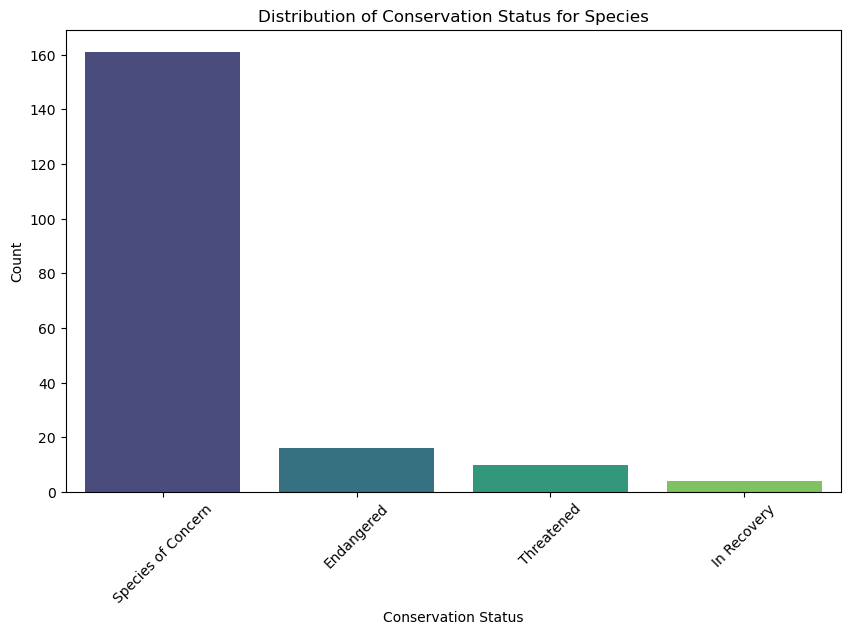

In [53]:
# Distribution of species

# Drop rows where conservation_status is NaN
species_filtered = species.dropna(subset=['conservation_status'])

# Plot the histogram (bar plot) of the distribution of conservation status
plt.figure(figsize=(10, 6))
sns.countplot(x='conservation_status', data=species_filtered, palette='viridis', order=species_filtered['conservation_status'].value_counts().index)

# Customize the plot
plt.title('Distribution of Conservation Status for Species')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Distribution of Conservation Status for Species

By far the most common conservation status (excluding no issue) is 'species of concern'. Other species are endangered or threatened, and the smallest proportion are considered 'in recovery'.

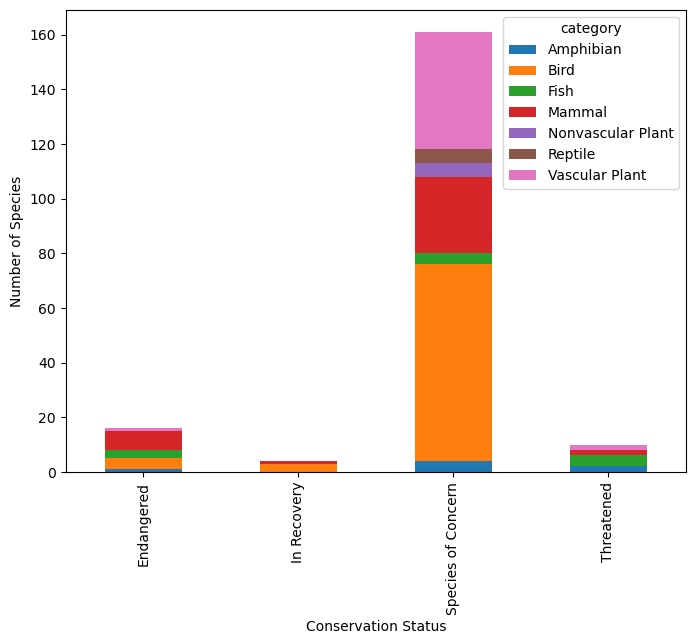

In [80]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

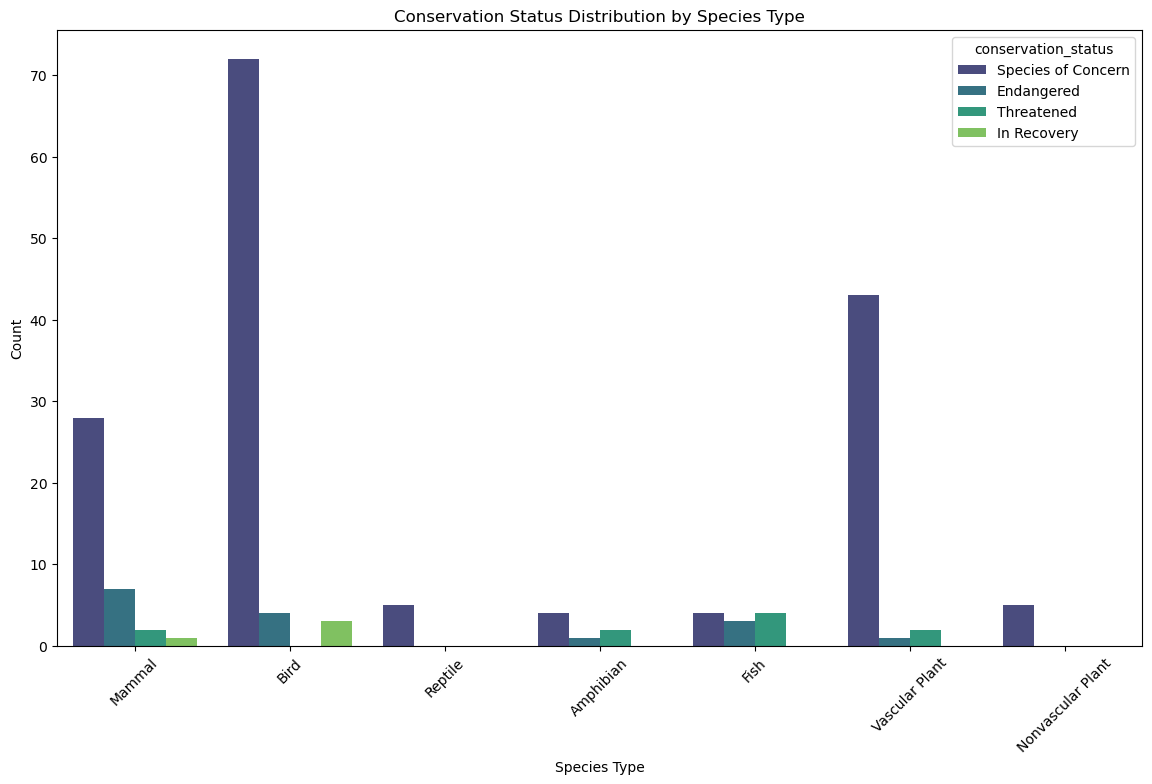

In [49]:
# Species filtered by type

# Plot the bar plot to see the distribution of conservation status within each species type
plt.figure(figsize=(14, 8))
sns.countplot(x='category', hue='conservation_status', data=species_filtered, palette='viridis')

# Customize the plot
plt.title('Conservation Status Distribution by Species Type')
plt.xlabel('Species Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Conservation Status Distribution by Species Type

The greatest species category in terms of concern is birds, which also has a proportionally large number of endangered species. Species of vascular plants are also of concern.

More mammals are endangeder than other species categories. Categories of least concern overall are reptiles and nonvascular plants.

## EDA - Observations Data Frame

In [29]:
observations.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23291    False
23292    False
23293    False
23294    False
23295    False
Length: 23296, dtype: bool

In [31]:
observations.isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [33]:
observations.scientific_name.unique()

array(['Vicia benghalensis', 'Neovison vison', 'Prunus subcordata', ...,
       'Ranunculus hebecarpus', 'Gulo gulo', 'Dichanthelium depauperatum'],
      dtype=object)

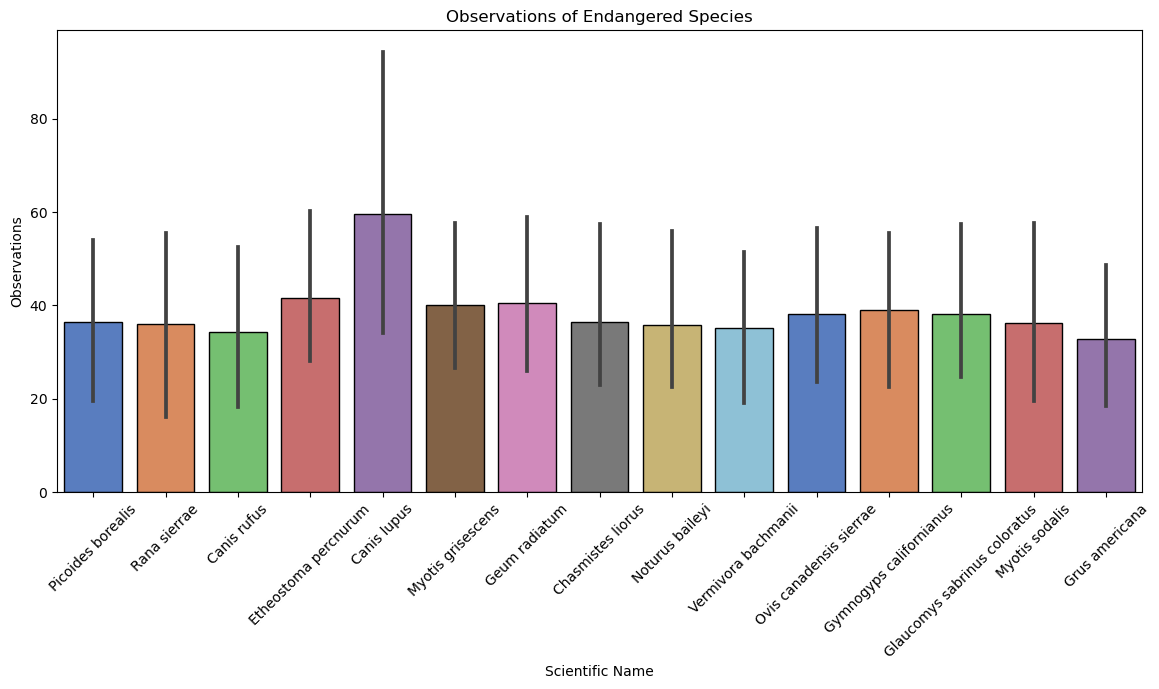

In [35]:
# Filter the DataFrame to include only rows where conservation_status is "Endangered"
endangered_species = species[species['conservation_status'] == 'Endangered']

# Match these endangered species to observations in the observations DataFrame
endangered_scientific_names = endangered_species['scientific_name']
observations_of_endangered = observations[observations['scientific_name'].isin(endangered_scientific_names)]

# Plot the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='scientific_name', y='observations', data=observations_of_endangered, palette="muted", edgecolor='black')

# Customise the plot
plt.title('Observations of Endangered Species')
plt.xlabel('Scientific Name')
plt.ylabel('Observations')
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Observations of Endangered Species

Canis lupus was the most frequently observed endangered species. Most other endangered species were observed around 40 times in the 7 day period.

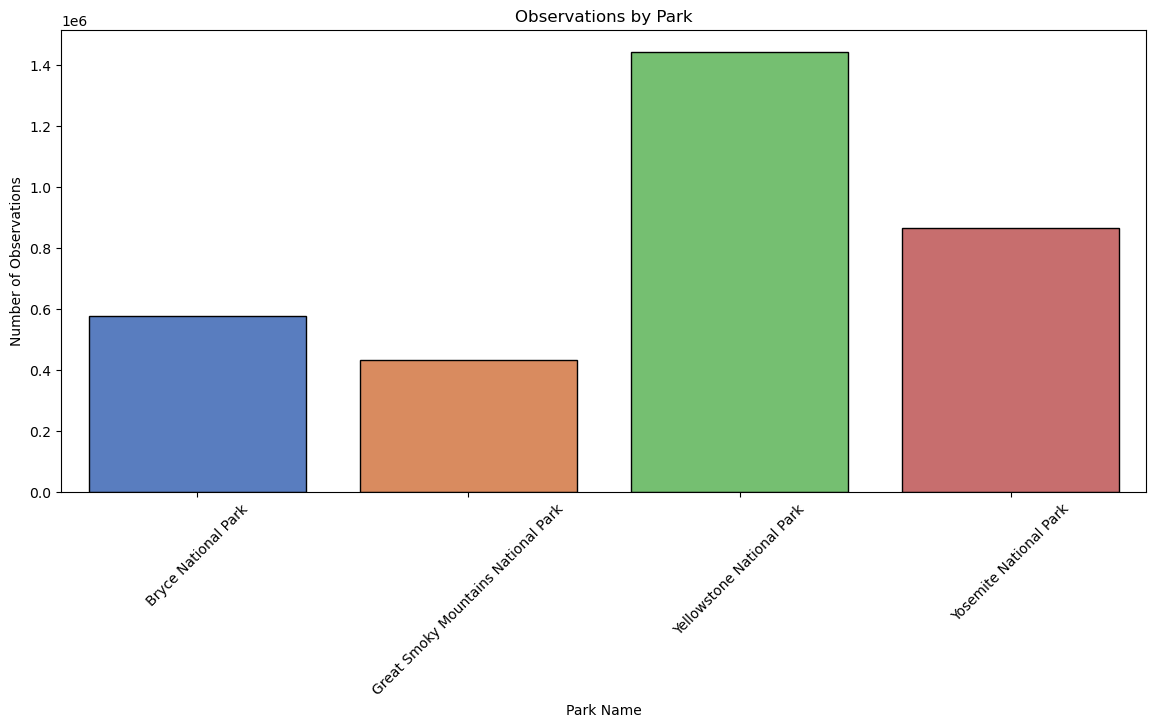

In [51]:
# Number of observations at each park
observations_by_park = observations.groupby('park_name')['observations'].sum().reset_index()

# Plot the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='park_name', y='observations', data=observations_by_park, palette='muted', edgecolor='black')

# Customise the plot
plt.title('Observations by Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Observations by Park

The greatest number of observations took place in Yellowstone National Park with the least being in Great Smoky Mountains National Park. 

In [82]:
# Consider links between species type and conservation status
species['is_protected'] = species.conservation_status != 'Healthy Population'

In [84]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [86]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


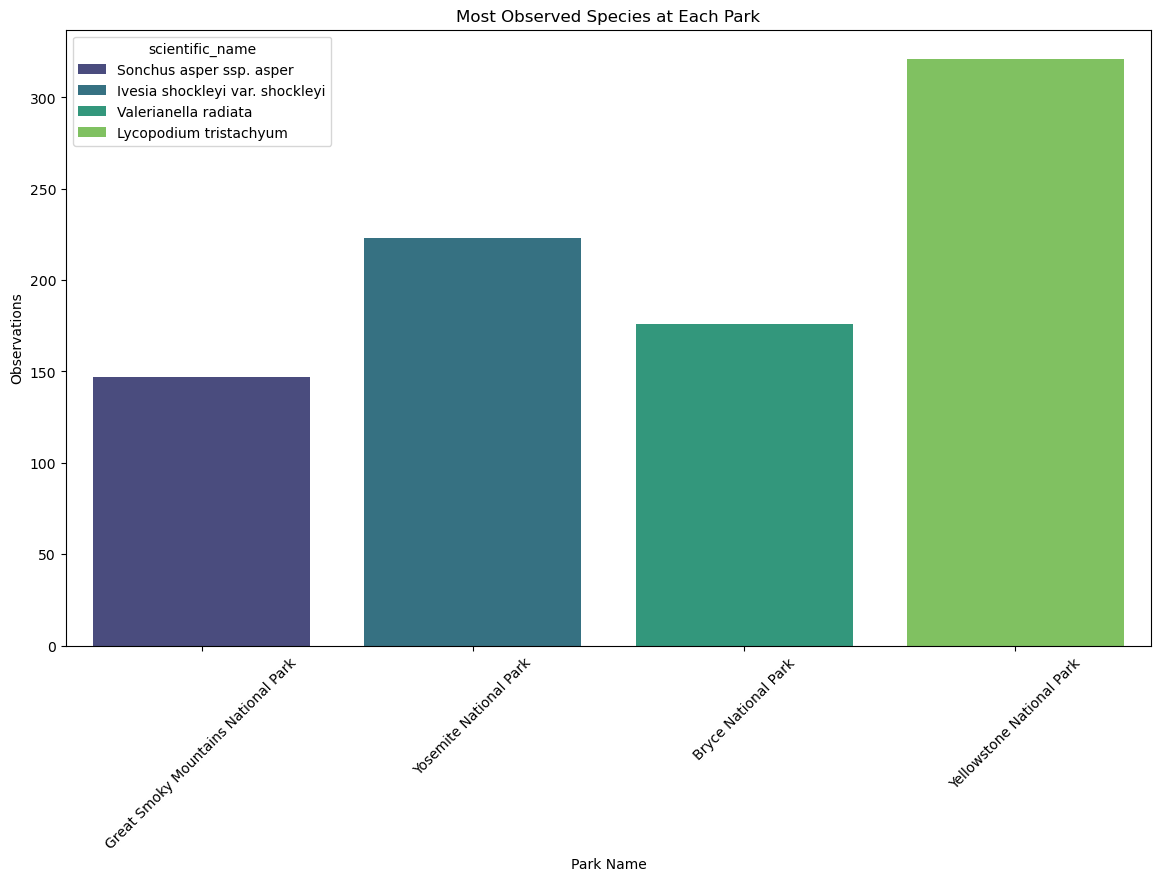

In [47]:
# Get the list of unique parks
parks_list = observations['park_name'].unique()

# Prepare a list to hold the most observed species at each park
most_observed_species_list = []

# Find the most observed species at each park
for park in parks_list:
    park_data = observations[observations['park_name'] == park]
    most_observed = park_data.loc[park_data['observations'].idxmax()]
    most_observed_species_list.append(most_observed)

# Convert the list to a DataFrame
most_observed_species = pd.DataFrame(most_observed_species_list)

# Plot the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='park_name', y='observations', hue='scientific_name', data=most_observed_species, palette="viridis", dodge=False)

# Customize the plot
plt.title('Most Observed Species at Each Park')
plt.xlabel('Park Name')
plt.ylabel('Observations')
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Conclusion

Within the 4 National Park locations the vast amount (96%) of species are not considered to be in any risk of extinction. For the 4% that are in some danger, the greatest proprtion (160) are considered 'species of concern', while species that are 'endangered', 'threatened', or 'in recovery' each number under 20.

The largest species category of concern is birds, followed by vascular plants and mammals, yet it is mammals that are most likely to be endangered.

The greatest percentages of protected species are mammals (17%) and birds (15%), which is logical considering their endangered and species of concern statistics. Vascular plants, despite being the second biggest species of concern, is in fact the least protected (a mere 1%).

At Yellowstone, Lycopodium tristachyum were observed over 300 times in the 7 day period while Ivesia shockley were observed around 225 time at Yosemite. Sonchus asper were observed almost 150 times in the Great Smoky Mountains and in Bryce there were around 175 observations of Valerianella radiata.